## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv('saham_n_crypto5y.csv')
df = df[df['Symbol'] == 'ETH-USD']
df.head()

Symbol        Date      Open      High       Low     Close  Adj Close  \
5610  ETH-USD  2016-01-01  0.933712  0.954822  0.931442  0.948024   0.948024   
5611  ETH-USD  2016-01-02  0.947401  0.969637  0.936560  0.937124   0.937124   
5612  ETH-USD  2016-01-03  0.938430  0.991362  0.934313  0.971905   0.971905   
5613  ETH-USD  2016-01-04  0.972045  0.976438  0.929835  0.954480   0.954480   
5614  ETH-USD  2016-01-05  0.953147  0.970597  0.946543  0.950176   0.950176   

        Volume  
5610  206062.0  
5611  255504.0  
5612  407632.0  
5613  346245.0  
5614  219833.0

## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 5610 to 7436
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     1827 non-null   object 
 1   Date       1827 non-null   object 
 2   Open       1823 non-null   float64
 3   High       1823 non-null   float64
 4   Low        1823 non-null   float64
 5   Close      1823 non-null   float64
 6   Adj Close  1823 non-null   float64
 7   Volume     1823 non-null   float64
dtypes: float64(6), object(2)
memory usage: 128.5+ KB


In [4]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1823.000000  1823.000000  1823.000000  1823.000000  1823.000000   
mean    240.686546   249.058994   231.490532   241.026271   241.026271   
std     231.711333   241.661894   220.074794   231.826282   231.826282   
min       0.933712     0.954822     0.929835     0.937124     0.937124   
25%      45.575001    48.292749    43.252701    46.316549    46.316549   
50%     194.671631   200.740005   186.735550   194.706207   194.706207   
75%     320.938996   334.460999   310.722458   321.851502   321.851502   
max    1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   

             Volume  
count  1.823000e+03  
mean   4.815104e+09  
std    5.917239e+09  
min    2.060620e+05  
25%    9.514610e+07  
50%    2.020748e+09  
75%    7.828586e+09  
max    3.142113e+10

In [5]:
df.shape

(1827, 8)

## Data Cleaning and Preprocessing

### Check Duplicate Data

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(1827, 8)

### Check Data Types

In [8]:
df.dtypes

Symbol        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Symbol               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

### Check Missing Value

In [11]:
df.isnull().sum()

Symbol       0
Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Symbol       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Exploratory Data Analysis

### ETH 2016-2020 Candlestick Chart

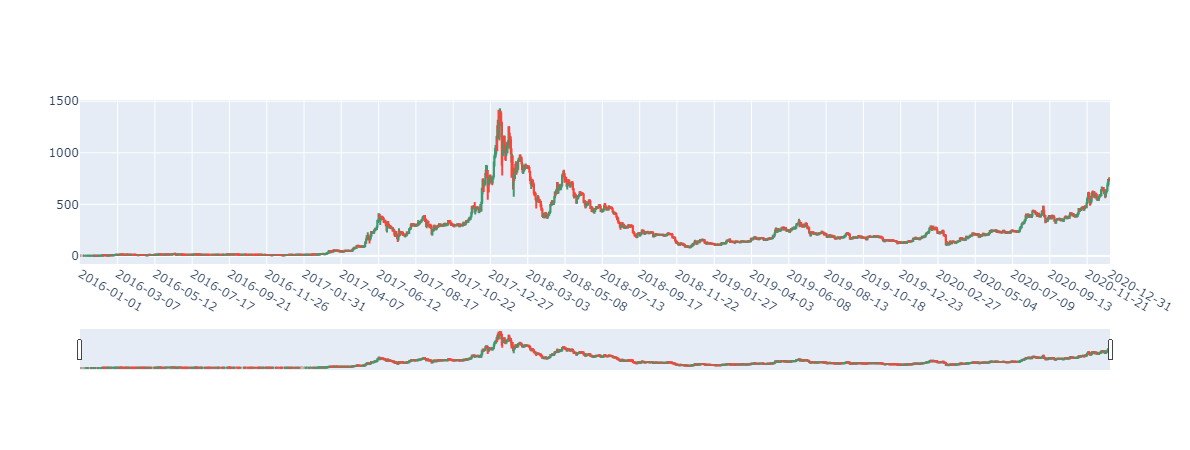

In [14]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

df_eth5y = df.query("""`Symbol` == 'ETH-USD'""")

chart_data = pd.concat([
	df_eth5y['Date'],
	df_eth5y['Open'],
	df_eth5y['Close'],
	df_eth5y['High'],
	df_eth5y['Low'],
], axis=1)
chart_data = chart_data.sort_values(['Date'])

chart = [go.Candlestick(
	x=chart_data['Date'], open=chart_data['Open'], close=chart_data['Close'],
	high=chart_data['High'], low=chart_data['Low'],
)]
figure = go.Figure(data=chart, layout=go.Layout({
    'legend': {'orientation': 'h', 'x': 0.99, 'xanchor': 'right', 'y': 1.1, 'yanchor': 'top'},
    'xaxis': {'tickmode': 'array',
              'ticktext': ['2016-01-01', '2016-03-07', '2016-05-12', '2016-07-17',
                           '2016-09-21', '2016-11-26', '2017-01-31', '2017-04-07',
                           '2017-06-12', '2017-08-17', '2017-10-22', '2017-12-27',
                           '2018-03-03', '2018-05-08', '2018-07-13', '2018-09-17',
                           '2018-11-22', '2019-01-27', '2019-04-03', '2019-06-08',
                           '2019-08-13', '2019-10-18', '2019-12-23', '2020-02-27',
                           '2020-05-04', '2020-07-09', '2020-09-13', '2020-11-21',
                           '2020-12-31'],
              'tickvals': [0, 66, 132, 198, 264, 330, 396, 462, 528, 594, 660,
                           726, 792, 858, 924, 990, 1056, 1122, 1188, 1254, 1320,
                           1386, 1452, 1518, 1584, 1650, 1716, 1782, 1822],
              'type': 'category'}
}))
figure.show()

### Variable Correlation

<AxesSubplot:>

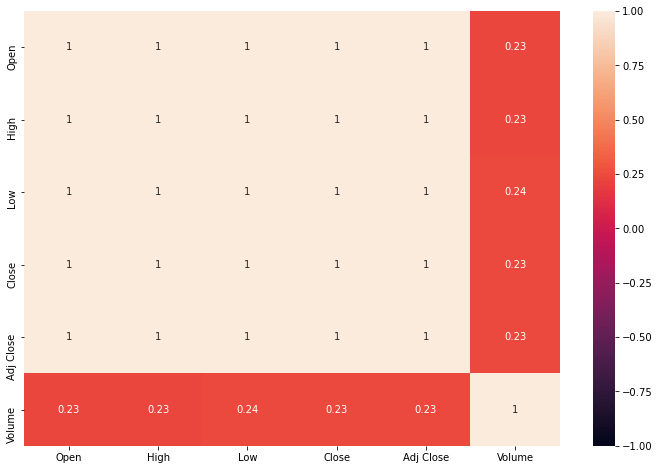

In [15]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1)

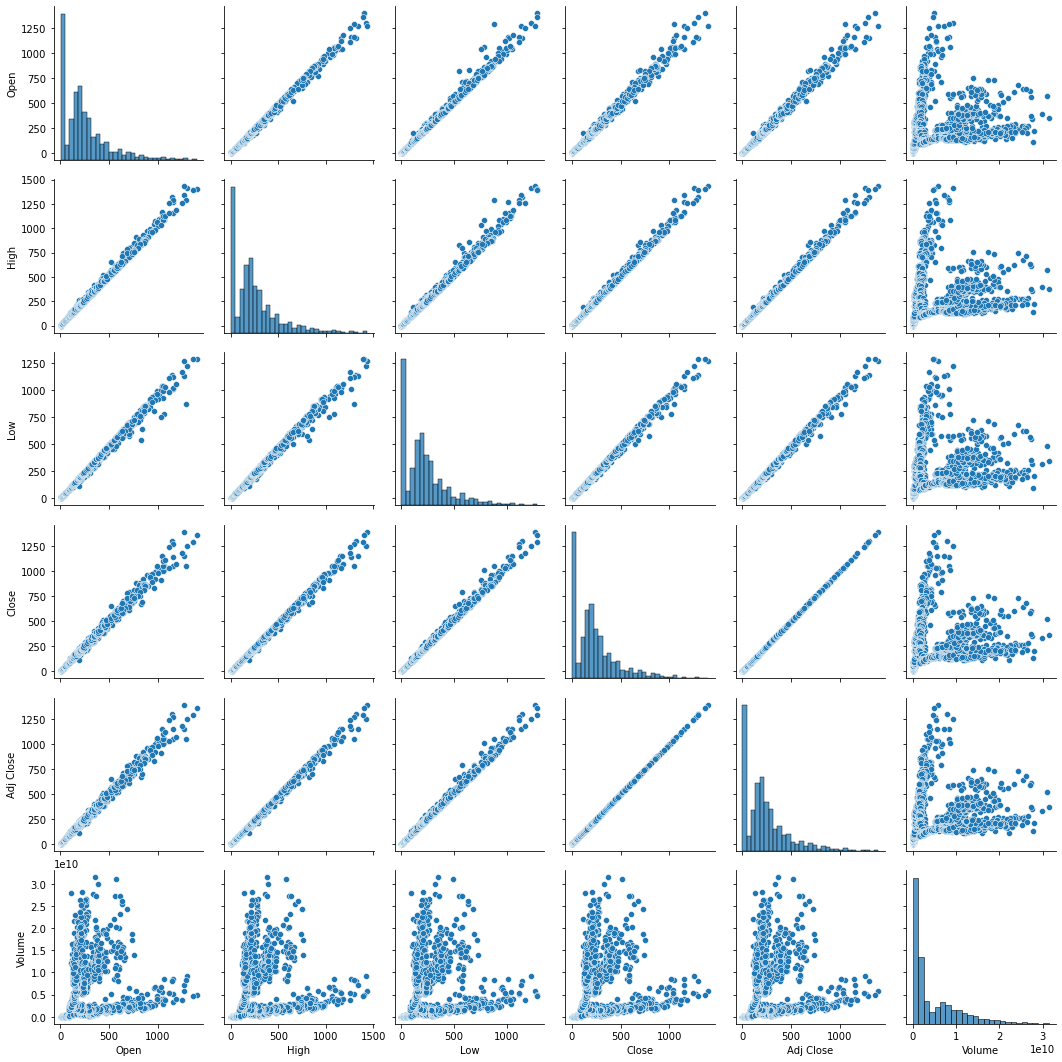

In [16]:
sns.pairplot(data=df)

## Modelling

### Multiple Linear Regression

#### Data Partition

In [17]:
x = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df.loc[:,'Close']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 123)

#### Build Model

In [19]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

#### Model Predictions

In [21]:
pred = lin_reg.predict(x_test)

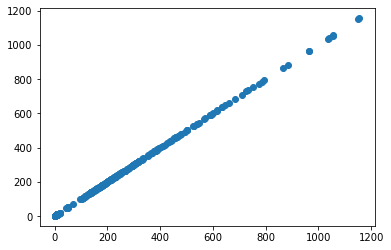

In [22]:
plt.scatter(y_test, pred)

#### Model Evaluation

In [23]:
print(lin_reg.intercept_)

4.121147867408581e-12


In [24]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

Coefficient
Open       7.303568e-15
High      -6.215031e-15
Low        1.076074e-15
Adj Close  1.000000e+00
Volume    -9.529121e-22

In [25]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 4.579828449509135e-12
MSE: 3.388192230565165e-23
RMSE: 5.820818010009559e-12
R2 Square 1.0
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.4034388237559755e-12
MSE: 3.034342725511102e-23
RMSE: 5.508486838970482e-12
R2 Square 1.0
__________________________________


In [26]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

Model           MAE           MSE          RMSE  R2 Square
0  Linear Regression  4.579828e-12  3.388192e-23  5.820818e-12        1.0

#### Real Data Predictions (2021 Q1-Q2)

In [27]:
eth_pred = pd.read_csv("eth_pred.csv")
eth_pred['Date'] = pd.to_datetime(eth_pred['Date'])

In [28]:
x_pred = eth_pred[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y_pred = eth_pred.loc[:,'Close']

In [29]:
pred = lin_reg.predict(x_pred)

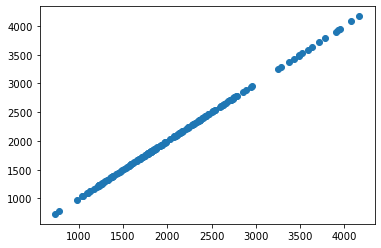

In [30]:
plt.scatter(y_pred, pred)

In [31]:
pred_set = lin_reg.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 2.5941954539105995e-11
MSE: 8.028948925348552e-22
RMSE: 2.833539998896884e-11
R2 Square 1.0
__________________________________


### Lasso Regression

#### Build Model

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
model = Lasso()
param_grid = {
    'alpha' : [0.1, 0.5, 10],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'precompute' : [True, False],
    'max_iter' : [1000, 2000, 5000],
    'tol' : [0.0001, 0.0005],
    'warm_start' : [True, False],
    'positive' : [True, False]
}

In [33]:
CV_lasso = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2, n_jobs = None or 1)
CV_lasso.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8606.516764509886, tolerance: 8133.857658094609

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 12963.11464896606, tolerance: 8407.720779226162

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8606.516764509886, tolerance: 8133.857658094609

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 12963.11464896606

GridSearchCV(cv=2, estimator=Lasso(), n_jobs=1,
             param_grid={'alpha': [0.1, 0.5, 10],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 5000],
                         'normalize': [True, False], 'positive': [True, False],
                         'precompute': [True, False], 'tol': [0.0001, 0.0005],
                         'warm_start': [True, False]})

In [34]:
CV_lasso.best_params_

{'alpha': 10,
 'fit_intercept': True,
 'max_iter': 5000,
 'normalize': False,
 'positive': False,
 'precompute': True,
 'tol': 0.0001,
 'warm_start': True}

In [35]:
CV_lasso.best_score_

0.9999976821046098

In [36]:
# With GridSearch

test_pred = CV_lasso.predict(x_test)
train_pred = CV_lasso.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.15424345062161812
MSE: 0.08037164545453825
RMSE: 0.28349893378024943
R2 Square 0.9999983483571632
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.1619938621322573
MSE: 0.1101445370888359
RMSE: 0.3318803053645032
R2 Square 0.9999979964826418
__________________________________


In [37]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  R2 Square
0  Linear Regression  4.579828e-12  3.388192e-23  5.820818e-12   1.000000
1   Lasso Regression  1.542435e-01  8.037165e-02  2.834989e-01   0.999998

#### Real Data Predictions (2021 Q1-Q2)

In [38]:
pred = CV_lasso.predict(x_pred)

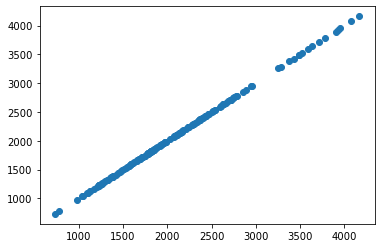

In [39]:
plt.scatter(y_pred, pred)

In [40]:
pred_set = CV_lasso.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 1.5837968366478214
MSE: 5.155605996304523
RMSE: 2.2705959561983993
R2 Square 0.9999893007707124
__________________________________


### Elastic Net Regression

#### Build Model

In [41]:
# With GridSearch

from sklearn.linear_model import ElasticNet
model = ElasticNet()
param_grid = {
    'alpha' : [0.1, 0.5, 10],
    'l1_ratio' : [0.1, 0.5, 0.9, 1],
    'fit_intercept' : [True, False],
    'normalize' : [True, False],
    'precompute' : [True, False],
    'max_iter' : [1000, 2000, 5000],
    'tol' : [0.0001, 0.0005],
    'warm_start' : [True, False],
    'positive' : [True, False]
}

In [42]:
CV_enet = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2)
CV_enet.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 12960.819104847893, tolerance: 8407.720779226162

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 12960.819104847893, tolerance: 8407.720779226162

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 12960.819096921845, tolerance: 8407.720779226162

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 12960.81909692

GridSearchCV(cv=2, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 10],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.5, 0.9, 1],
                         'max_iter': [1000, 2000, 5000],
                         'normalize': [True, False], 'positive': [True, False],
                         'precompute': [True, False], 'tol': [0.0001, 0.0005],
                         'warm_start': [True, False]})

In [43]:
CV_enet.best_params_

{'alpha': 10,
 'fit_intercept': True,
 'l1_ratio': 1,
 'max_iter': 5000,
 'normalize': False,
 'positive': False,
 'precompute': True,
 'tol': 0.0001,
 'warm_start': True}

In [44]:
CV_enet.best_score_

0.9999976821046098

In [45]:
test_pred = CV_enet.predict(x_test)
train_pred = CV_enet.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.15424345062161812
MSE: 0.08037164545453825
RMSE: 0.28349893378024943
R2 Square 0.9999983483571632
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.1619938621322573
MSE: 0.1101445370888359
RMSE: 0.3318803053645032
R2 Square 0.9999979964826418
__________________________________


In [46]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  R2 Square
0       Linear Regression  4.579828e-12  3.388192e-23  5.820818e-12   1.000000
1        Lasso Regression  1.542435e-01  8.037165e-02  2.834989e-01   0.999998
2  Elastic Net Regression  1.542435e-01  8.037165e-02  2.834989e-01   0.999998

#### Real Data Predictions (2021 Q1-Q2)

In [47]:
pred = CV_enet.predict(x_pred)

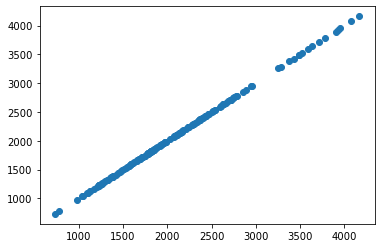

In [48]:
plt.scatter(y_pred, pred)

In [49]:
pred_set = CV_enet.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 1.5837968366478214
MSE: 5.155605996304523
RMSE: 2.2705959561983993
R2 Square 0.9999893007707124
__________________________________


### Random Forest Regressor

#### Build Model

In [50]:
# With GridSearch

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'criterion' : ['mae','mse'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'bootstrap' : [True, False],
    'oob_score' : [True, False],
    'warm_start' : [True, False]
}

In [51]:
CV_rf = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2)
CV_rf.fit(x_train, y_train)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True


C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mae', 'mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000],
                         'oob_score': [True, False],
                         'warm_start': [True, False]})

In [52]:
CV_rf.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_features': 'auto',
 'n_estimators': 500,
 'oob_score': False,
 'warm_start': True}

In [53]:
CV_rf.best_score_

0.9992841760325295

In [54]:
test_pred = CV_rf.predict(x_test)
train_pred = CV_rf.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7654958122684354
MSE: 17.161363161673652
RMSE: 4.142627567338591
R2 Square 0.999647332807786
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.32827975493145406
MSE: 2.345100709451238
RMSE: 1.531372165559776
R2 Square 0.9999573428687226
__________________________________


In [55]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0        Linear Regression  4.579828e-12  3.388192e-23  5.820818e-12   
1         Lasso Regression  1.542435e-01  8.037165e-02  2.834989e-01   
2   Elastic Net Regression  1.542435e-01  8.037165e-02  2.834989e-01   
3  Random Forest Regressor  7.654958e-01  1.716136e+01  4.142628e+00   

   R2 Square  
0   1.000000  
1   0.999998  
2   0.999998  
3   0.999647

#### Real Data Predictions (2021 Q1-Q2)

In [56]:
pred = CV_rf.predict(x_pred)

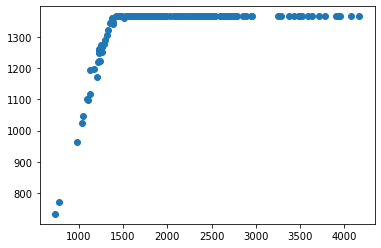

In [57]:
plt.scatter(y_pred, pred)

In [58]:
pred_set = CV_rf.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 737.9663270312494
MSE: 972705.9396026249
RMSE: 986.2585561619351
R2 Square -1.0186189333935496
__________________________________


### Support Vector Machine

#### Feature Scalling

In [59]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ('std_scalar', StandardScaler()) ])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

#### Build Model

In [60]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', epsilon=0.001)
svm_reg.fit(x_train, y_train)

test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 50.53739220796413
MSE: 18661.641179458013
RMSE: 136.60761757478247
R2 Square 0.6165019914290336
__________________________________
Train set evaluation:
_____________________________________
MAE: 56.139743133581824
MSE: 22233.03739828586
RMSE: 149.10746929072957
R2 Square 0.5955834258328228
__________________________________


In [61]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model           MAE           MSE          RMSE  \
0        Linear Regression  4.579828e-12  3.388192e-23  5.820818e-12   
1         Lasso Regression  1.542435e-01  8.037165e-02  2.834989e-01   
2   Elastic Net Regression  1.542435e-01  8.037165e-02  2.834989e-01   
3  Random Forest Regressor  7.654958e-01  1.716136e+01  4.142628e+00   
4            SVM Regressor  5.053739e+01  1.866164e+04  1.366076e+02   

   R2 Square  
0   1.000000  
1   0.999998  
2   0.999998  
3   0.999647  
4   0.616502

#### Real Data Predictions (2021 Q1-Q2)

In [62]:
pred = svm_reg.predict(x_pred)

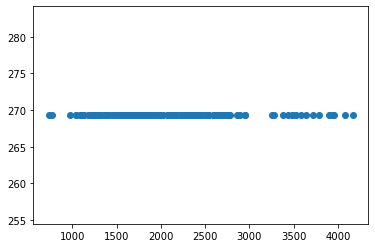

In [63]:
plt.scatter(y_pred, pred)

In [64]:
pred_set = svm_reg.predict(x_pred)

print('Pred set evaluation:\n_____________________________________')
print_evaluate(y_pred, pred_set)

Pred set evaluation:
_____________________________________
MAE: 1802.7626613883374
MSE: 3731820.257893321
RMSE: 1931.7919810096844
R2 Square -6.744501932087029
__________________________________


## Models Comparison

<AxesSubplot:ylabel='Model'>

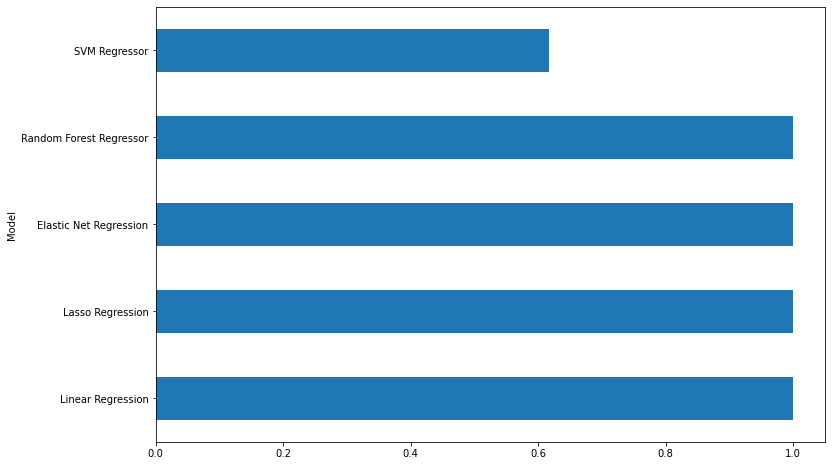

In [65]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot:ylabel='Model'>

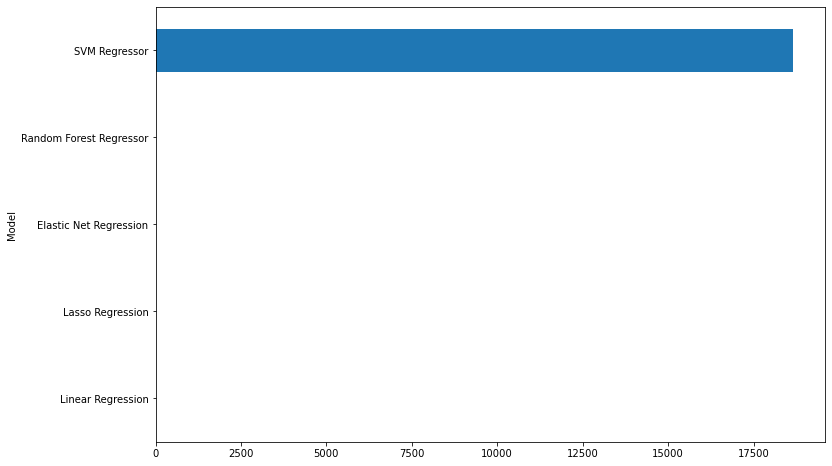

In [66]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))